# Imports 

In [1]:
print('hi')

hi


In [2]:
import sys
sys.path

['/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow',
 '/home/eag190/miniconda3/envs/simulations/lib/python39.zip',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/lib-dynload',
 '',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages',
 '/cache/home/eag190/ECD_control',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages/quantum_optimal_control-0.1.0-py3.9.egg']

In [3]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [4]:
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [5]:
%load_ext autoreload
%autoreload 2

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# 3DMM2 parameters

In [6]:
# chi = Peak splitting MHz
chis = 2*array([-1.1962, -0.8676]) 
kappas  = array([18,9.02]) # kHz

# Multimode circle grape

In [7]:
#TODO: Figure out why relative import doesn't work
from circle_grape_v2 import *

done


In [8]:
transmon_levels = 2

#  Params :  $\alpha = 30.0 , \delta_c = -0.030$ GHz, $\tau = 500$ ns, $\Omega_{max} =1$ MHz

In [9]:
mode = 1
mode_levels = 5
chi,kappa = chis[mode]*1e-3,kappas[mode]*1e-6
circle_grape_params = {"chis":[chi],"kappas":[kappa],"alpha":10.0,"delta_c":-0.010}

op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                            number_of_modes = 1,hparams = circle_grape_params,add_disp_kerr=False)




In [10]:
import sys
sys.path

['/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow',
 '/home/eag190/miniconda3/envs/simulations/lib/python39.zip',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/lib-dynload',
 '',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages',
 '/cache/home/eag190/ECD_control',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages/quantum_optimal_control-0.1.0-py3.9.egg']

In [11]:
data_path = ''#'/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'

data saved at: 00000_g0_to_g1_circlgrape.h5


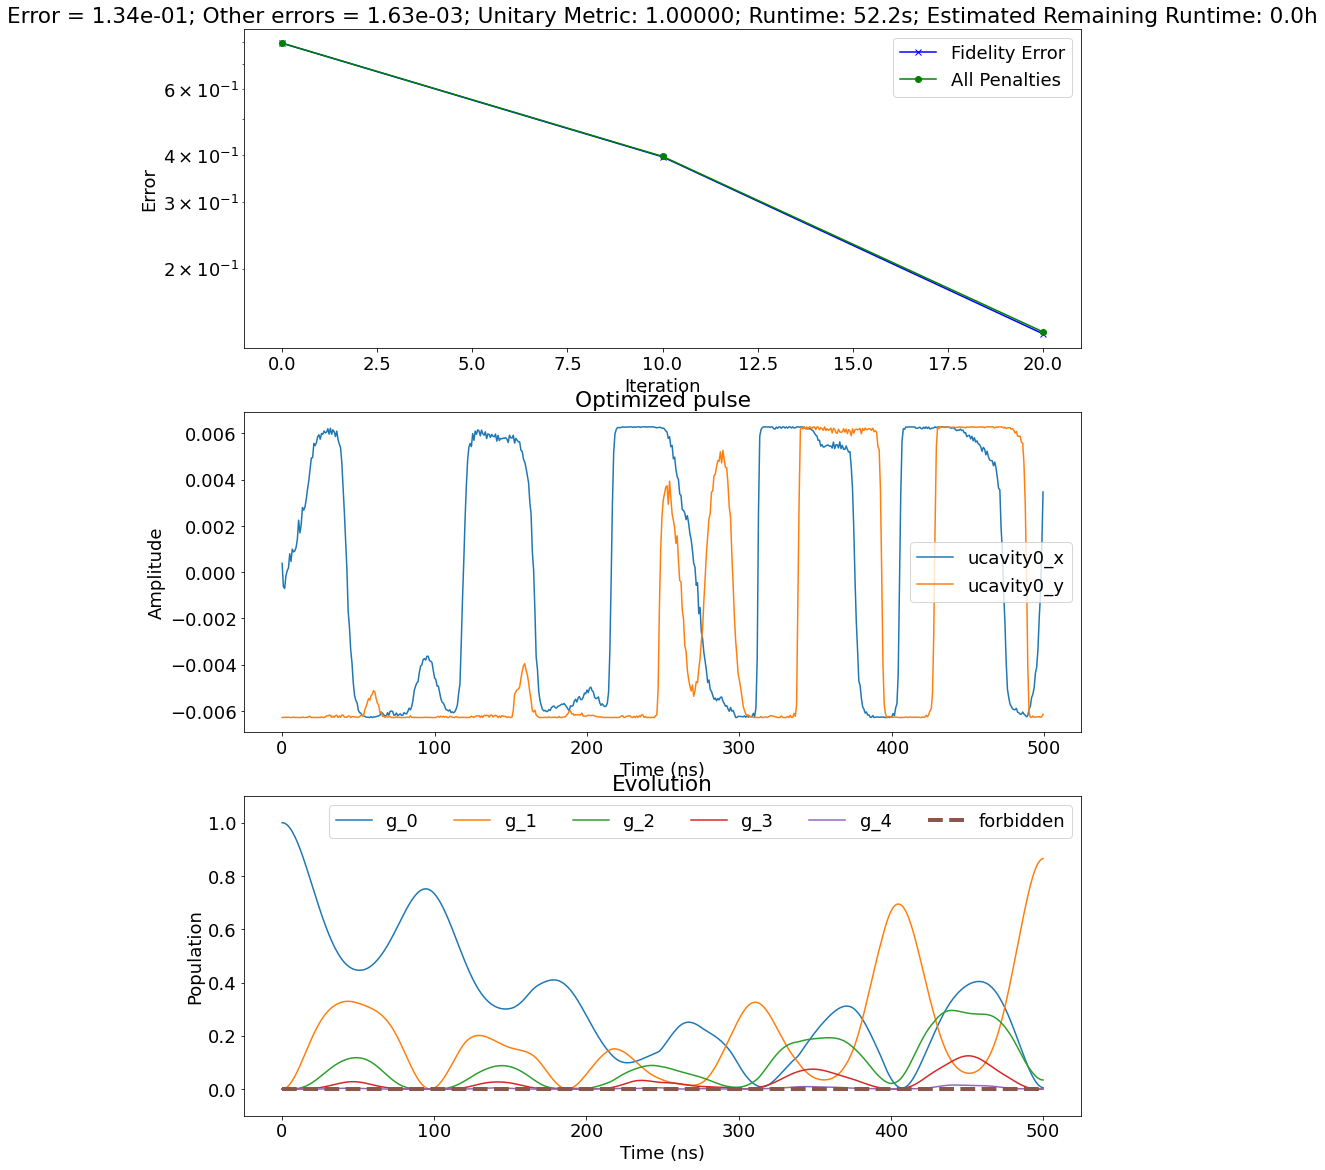

In [23]:
states_forbidden_list = []
total_time = 500.0
steps  = 600  #number of points over the total time where amplitudes will be specified

convergence = {'rate': 0.1, 'update_step': 10, 'max_iterations': 20,
               'conv_target': 3e-4, 'learning_rate_decay': 500.0}


reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
              'states_forbidden_list':states_forbidden_list,
              'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}



initial_guess = None

ss = op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
                        total_time = total_time, steps = steps,max_amp = 1e-3, 
                        taylor_terms = None,is_dressed=False, 
                        convergence = convergence, reg_coeffs =  reg_coeffs,
                        plot_only_g = True,
                        states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                        file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)

In [13]:
f = h5py.File('00005_g0_to_g1_circlgrape.h5', 'r')
err = f['error']

In [19]:
err[-1]

0.0

In [15]:
ss

(array([[-8.5794600e-05, -3.1095400e-04, -9.8785866e-05, ...,
          4.5212900e-04,  4.4902510e-04,  2.8135415e-04],
        [ 4.6793686e-04,  6.2328891e-04,  6.2675978e-04, ...,
          8.0630131e-04,  2.3822548e-04,  8.4377005e-04]], dtype=float32),
 [])

In [16]:
len(ss[0][0])

600

In [17]:
op.fidelity()

AttributeError: 'multimode_circle_grape_optimal_control' object has no attribute 'fidelity'

In [ ]:
import os 
data_path = '/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'
file_path = 'test.h5'
file_path_f = os.path.join(data_path, file_path)
file_path_f

In [ ]:
hf = h5py.File(file_path_f, 'w')


In [ ]:
get_dressed_info

In [ ]:
w_c, v_c, dressed_id = get_dressed_info(op.H_rot())

In [ ]:
w_c

In [ ]:
v_c

In [ ]:
dressed_id